# Reshaping data with `stack` and `unstack`

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 8

## Case study: air quality data of European monitoring stations (AirBase)

Going further with the time series case study [test](05 - Time series data.ipynb) on the AirBase (The European Air quality dataBase) data: the actual data downloaded from the Airbase website did not look like a nice csv file (`data/airbase_data.csv`).

One of the actual downloaded raw data files of AirBase is included in the repo:

In [2]:
!head -1 ./data/BETR8010000800100hour.1-1-1990.31-12-2012

1990-01-01	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0


Just reading the tab-delimited data:

In [3]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012", sep='\t')#, header=None)

In [4]:
data.head()

,1990-01-01,-999.000,0,-999.000.1,0.1,-999.000.2,0.2,-999.000.3,0.3,-999.000.4,...,-999.000.19,0.19,-999.000.20,0.20,-999.000.21,0.21,-999.000.22,0.22,-999.000.23,0.23
0,1990-01-02,-999,0,-999,0,-999,0,-999,0,-999,...,57,1,58,1,54,1,49,1,48,1
1,1990-01-03,51,1,50,1,47,1,48,1,51,...,84,1,75,1,-999,0,-999,0,-999,0
2,1990-01-04,-999,0,-999,0,-999,0,-999,0,-999,...,69,1,65,1,64,1,60,1,59,1
3,1990-01-05,51,1,51,1,48,1,50,1,51,...,-999,0,-999,0,-999,0,-999,0,-999,0
4,1990-01-06,-999,0,-999,0,-999,0,-999,0,-999,...,-999,0,-999,0,-999,0,-999,0,-999,0


The above data is clearly not ready to be used! Each row contains the 24 measurements for each hour of the day, and also contains a flag (0/1) indicating the quality of the data.

<div class="alert alert-success">
    <b>EXERCISE</b>: Clean up this dataframe using more options of `read_csv`
</div>

- specify that the values of -999 and -9999 should be regarded as NaN
- specify are own column names (http://stackoverflow.com/questions/6356041/python-intertwining-two-lists)

In [5]:
colnames = ['date'] + [item for pair in zip(["{:02d}".format(i) for i in range(24)], ['flag']*24) for item in pair]

data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012",
                   sep='\t', header=None, na_values=[-999, -9999], names=colnames)

In [6]:
data.head()

,date,00,flag,01,flag,02,flag,03,flag,04,...,19,flag,20,flag,21,flag,22,flag,23,flag
0,1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,1990-01-02,NaN,1,NaN,1,NaN,1,NaN,1,NaN,...,57,1,58,1,54,1,49,1,48,1
2,1990-01-03,51,0,50,0,47,0,48,0,51,...,84,0,75,0,NaN,0,NaN,0,NaN,0
3,1990-01-04,NaN,1,NaN,1,NaN,1,NaN,1,NaN,...,69,1,65,1,64,1,60,1,59,1
4,1990-01-05,51,0,51,0,48,0,50,0,51,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


For now, we disregard the 'flag' columns

In [7]:
data = data.drop('flag', axis=1)
data

,date,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,59.0,58,59.0,58.0,57.0,58.0,54.0,49.0,48.0
2,1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74,70.0,70.0,69.0,65.0,64.0,60.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,2012-12-28,26.5,28.5,35.5,32.0,35.5,50.5,62.5,74.5,76.0,...,56.5,52.0,55,53.5,49.0,46.5,42.5,38.5,30.5,26.5
8389,2012-12-29,21.5,16.5,13.0,13.0,16.0,23.5,23.5,27.5,46.0,...,48.0,41.5,36,33.0,25.5,21.0,22.0,20.5,20.0,15.0
8390,2012-12-30,11.5,9.5,7.5,7.5,10.0,11.0,13.5,13.5,17.5,...,NaN,25.0,25,25.5,24.5,25.0,18.5,17.0,15.5,12.5
8391,2012-12-31,9.5,8.5,8.5,8.5,10.5,15.5,18.0,23.0,25.0,...,NaN,NaN,28,27.5,26.0,21.0,16.5,14.5,16.5,15.0


Now, we want to reshape it: our goal is to have the different hours as row indices, merged with the date into a datetime-index.

## Intermezzo: reshaping your data with `stack`, `unstack` and `pivot`

The docs say:

> Pivot a level of the (possibly hierarchical) column labels, returning a
DataFrame (or Series in the case of an object with a single level of
column labels) having a hierarchical index with a new inner-most level
of row labels.

<img src="img/stack.png" width=70%>

In [8]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


To use `stack`/`unstack`, we need the values we want to shift from rows to columns or the other way around as the index:

In [9]:
df = df.set_index(['A', 'B'])
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [10]:
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


In [11]:
df = result.stack().reset_index(name='C')
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


`pivot` is similar to `unstack`, but let you specify column names:

In [12]:
df.pivot(index='A', columns='B', values='C')

B,a,b
A,,
one,0,1
two,2,3


`pivot_table` is similar as `pivot`, but can work with duplicate indices and let you specify an aggregation function:

In [13]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two', 'one', 'two'], 'B':['a', 'b', 'a', 'b', 'a', 'b'], 'C':range(6)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3
4,one,a,4
5,two,b,5


In [14]:
df.pivot_table(index='A', columns='B', values='C', aggfunc='count') #'mean'

B,a,b
A,,
one,2,1
two,1,2


## Back to our case study

We can now use `stack` and some other functions to create a timeseries from the original dataframe:

In [15]:
colnames = ['date'] + [item for pair in zip(["{:02d}".format(i) for i in range(24)], ['flag']*24) for item in pair]

data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012",
                   sep='\t', header=None, na_values=[-999, -9999], names=colnames)
data = data.drop('flag', axis=1)

In [16]:
data.head()

,date,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55,59,58,59,58,57,58,54,49,48
2,1990-01-03,51,50,47,48,51,52,58,57,NaN,...,69,74,NaN,NaN,103,84,75,NaN,NaN,NaN
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71,74,70,70,69,65,64,60,59
4,1990-01-05,51,51,48,50,51,58,65,66,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-success">
    <b>EXERCISE</b>: Reshape the dataframe to a timeseries
</div>

The end result should look like:


<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>BETR801</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1990-01-02 09:00:00</th>
      <td>48.0</td>
    </tr>
    <tr>
      <th>1990-01-02 12:00:00</th>
      <td>48.0</td>
    </tr>
    <tr>
      <th>1990-01-02 13:00:00</th>
      <td>50.0</td>
    </tr>
    <tr>
      <th>1990-01-02 14:00:00</th>
      <td>55.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th>2012-12-31 20:00:00</th>
      <td>16.5</td>
    </tr>
    <tr>
      <th>2012-12-31 21:00:00</th>
      <td>14.5</td>
    </tr>
    <tr>
      <th>2012-12-31 22:00:00</th>
      <td>16.5</td>
    </tr>
    <tr>
      <th>2012-12-31 23:00:00</th>
      <td>15.0</td>
    </tr>
  </tbody>
</table>
<p>170794 rows × 1 columns</p>
</div>

First, reshape the dataframe so that each row consists of one observation for one date + hour combination:

In [17]:
data = data.set_index('date')

In [18]:
data_stacked = data.stack()

In [19]:
data_stacked

date          
1990-01-02  09    48.0
            12    48.0
            13    50.0
            14    55.0
                  ... 
2012-12-31  20    16.5
            21    14.5
            22    16.5
            23    15.0
dtype: float64

Now, combine the date and hour colums into a datetime (tip: string columns can be summed to concatenate the strings):

In [20]:
data_stacked = data_stacked.reset_index(name='BETR801')

In [21]:
data_stacked.head()

,date,level_1,BETR801
0,1990-01-02,09,48
1,1990-01-02,12,48
2,1990-01-02,13,50
3,1990-01-02,14,55
4,1990-01-02,15,59


In [22]:
data_stacked.index = pd.to_datetime(data_stacked['date'] + data_stacked['level_1'], format="%Y-%m-%d%H")

In [23]:
data_stacked = data_stacked.drop(['date', 'level_1'], axis=1)

In [24]:
data_stacked

,BETR801
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
...,...
2012-12-31 20:00:00,16.5
2012-12-31 21:00:00,14.5
2012-12-31 22:00:00,16.5
2012-12-31 23:00:00,15.0


## We can also use this with the movie data

In [25]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [26]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">
    <b>EXERCISE</b>: Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?
</div>

In [27]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1,0
1940,1,0
1943,1,0
1948,0,1
1949,2,0


In [28]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
12


<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of actor roles each year and the number of actress roles each year over the history of film.
</div>

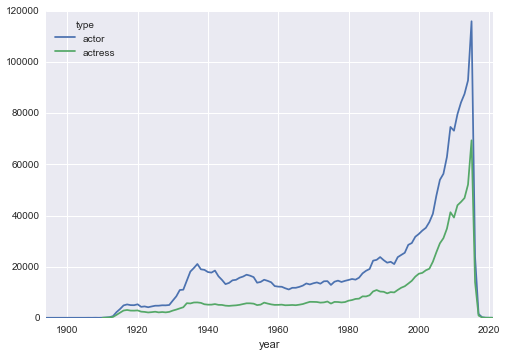

In [29]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.
</div>

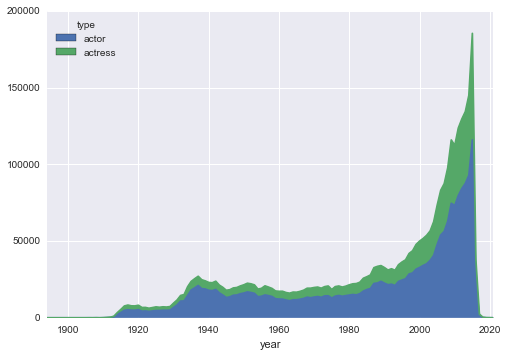

In [30]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind='area')